In [4]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly
import random

from scipy.stats import linregress

In [21]:
#import merge_city_pop_greater_than_200k.csv
pop_200_df = pd.read_csv("merge_city_pop_greater_than_200k.csv")
pop_200_df.head()


,Unnamed: 0,2012 Median Age,2012 Total Population,2012 Poverty Count,2012 Median Household Income,2012 Employed,2012 Unemployed,2012 Monthly Rent,2012 Owner Monthly Costs,"City, State",...,Monthly Rent Growth Rate (2015 to 2016),Owner Monthly Costs Growth Rate (2015 to 2016),5-Year Average Population Growth Rate,5-Year Average Age Growth Rate,5-Year Average Poverty Count Growth Rate,5-Year Average Median Household Income Growth Rate,5-Year Average Employed Growth Rate,5-Year Average Unemployed Growth Rate,5-Year Average Monthly Rent Growth Rate,5-Year Average Owner Monthly Costs Growth Rate
0,1003,33.325000,247294.0,18567.0,91518.500000,116773.0,8256.0,1216.000000,1830.000000,"Katy, TX",...,0.035921,0.022718,5.924817,0.632505,2.458720,1.698790,6.507591,2.387433,2.489258,0.071222
1,2252,34.100000,214291.0,23481.0,89558.666667,106513.0,7767.0,1785.222222,2943.222222,"Irvine, CA",...,0.049831,0.028050,3.699406,0.376676,6.953642,0.198074,3.058651,0.897965,2.459216,-1.015132
2,2383,35.200000,232075.0,40192.0,46162.571429,103111.0,14767.0,1112.428571,1576.142857,"Kissimmee, FL",...,0.019949,0.006082,3.552188,0.383692,7.990001,-0.120192,2.888022,-6.789064,0.613190,-3.393180
3,2939,36.025000,323197.0,19946.0,90619.375000,159809.0,9502.0,1217.125000,1838.875000,"Spring, TX",...,0.040925,0.011892,3.010138,0.493035,2.651771,1.505416,2.607840,-4.213583,3.375424,0.448610
4,3474,35.863158,379926.0,94325.0,37954.368421,172510.0,21285.0,900.052632,1607.578947,"New Orleans, LA",...,0.012929,0.013250,2.606485,0.556808,1.782645,1.853025,3.083344,-1.498844,1.206043,0.413636


In [7]:
#pop_200_df.columns

In [31]:
#Top 10 cities per highest avg population growth
#top10_df = pop_200_df.iloc[0:10,:]

l = ['2012','2013','2014','2015','2016']


list_actual_data=[]
for index, row in pop_200_df.iterrows():
    d = pd.DataFrame({"City, State": [row["City, State"], row["City, State"], row["City, State"], row["City, State"], row["City, State"]],
                     "Median Age": [row["2012 Median Age"], row["2013 Median Age"], row["2014 Median Age"], row["2015 Median Age"], row["2016 Median Age"]],
                     "Poverty Count": [row["2012 Poverty Count"], row["2013 Poverty Count"], row["2014 Poverty Count"], row["2015 Poverty Count"], row["2016 Poverty Count"]],
                     "Median Household Income": [row["2012 Median Household Income"], row["2013 Median Household Income"],row["2014 Median Household Income"],row["2015 Median Household Income"],row["2016 Median Household Income"]],
                     "Employed": [row["2012 Employed"],row["2013 Employed"],row["2014 Employed"],row["2015 Employed"],row["2016 Employed"]],
                     "Monthly Rent": [row["2012 Monthly Rent"],row["2013 Monthly Rent"],row["2014 Monthly Rent"],row["2015 Monthly Rent"],row["2016 Monthly Rent"]],
                     "Owner Monthly Costs": [row["2012 Owner Monthly Costs"],row["2013 Owner Monthly Costs"],row["2014 Owner Monthly Costs"],row["2015 Owner Monthly Costs"],row["2016 Owner Monthly Costs"]],
                        "Total Population": [row["2012 Total Population"],row["2013 Total Population"],row["2014 Total Population"],row["2015 Total Population"],row["2016 Total Population"]]
                      })
    d['Year'] = l


    list_actual_data.append(pd.DataFrame(d))

pop_200_split_df = pd.DataFrame()
for i in range(0 , len(list_actual_data)):
    pop_200_split_df = pd.concat([pop_200_split_df, list_actual_data[i]])

pop_200_split_df.head()

,"City, State",Median Age,Poverty Count,Median Household Income,Employed,Monthly Rent,Owner Monthly Costs,Total Population,Year
0,"Katy, TX",33.325,18567.0,91518.50,116773.0,1216.0,1830.00,247294.0,2012
1,"Katy, TX",33.475,20569.0,92813.50,124828.0,1227.0,1829.75,261394.0,2013
2,"Katy, TX",33.925,21497.0,93592.25,132936.0,1238.0,1823.25,276413.0,2014
3,"Katy, TX",34.075,21427.0,94176.50,141679.0,1294.5,1793.75,294511.0,2015
4,"Katy, TX",34.175,20327.0,97865.25,150265.0,1341.0,1834.50,311311.0,2016


In [23]:
#income vs Population
#use scipy.stats.linregress to compute slope and intercept for the best fit line
(slope, intercept, rval, pval, stderr) = linregress(pop_200_split_df['Total Population']
                                                    , pop_200_split_df['Median Household Income'])

print(f'Prediction(x) = {slope:0.4f} * x + {intercept:0.4f}')

pop_200_split_df['P_pop_Income'] = slope * pop_200_split_df['Total Population'] + intercept
pop_200_split_df.head()
print(rval, pval, stderr)

Prediction(x) = -0.0018 * x + 57439.5618
-0.052815232716723885 0.13312942888816096 0.0011695804073967309


Prediction(x) = 0.0000 * x + 1035.1123
0.026479114885426952 0.4517041582658915 2.0162869830638243e-05


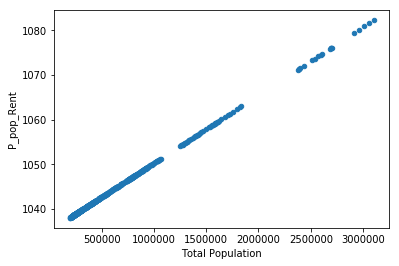

In [26]:
#Rent vs Population (do growth rate insteasd of actual values)
#use scipy.stats.linregress to compute slope and intercept for the best fit line
(slope, intercept, rval, pval, stderr) = linregress(pop_200_split_df['Total Population'], pop_200_split_df['Monthly Rent'])

print(f'Prediction(x) = {slope:0.4f} * x + {intercept:0.4f}')

pop_200_split_df['P_pop_Rent'] = slope * pop_200_split_df['Total Population'] + intercept
pop_200_split_df.head()
print(rval, pval, stderr)

pop_200_split_df.plot('Total Population', 'P_pop_Rent', kind = 'scatter')


In [ ]:
#Rent vs Population (do growth rate insteasd of actual values)
#use scipy.stats.linregress to compute slope and intercept for the best fit line
(slope, intercept, rval, pval, stderr) = linregress(pop_200_split_df['Total Population'], pop_200_split_df['Employed'])

print(f'Prediction(x) = {slope:0.4f} * x + {intercept:0.4f}')

pop_200_split_df['P_pop_Employed'] = slope * pop_200_split_df['Total Population'] + intercept
pop_200_split_df.head()
print(rval, pval, stderr)

pop_200_split_df.plot('Total Population', 'P_pop_Employed', kind = 'scatter')



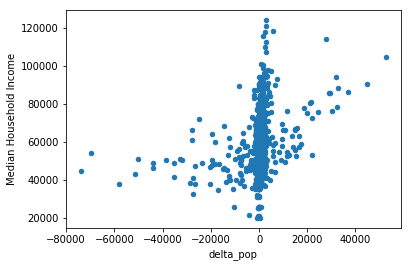

In [18]:
pop_200_split_df.plot('delta_pop', 'Median Household Income', kind='scatter')

In [16]:
pop_200_split_df.head()

,"City, State",Median Age,Poverty Count,Median Household Income,Employed,Monthly Rent,Owner Monthly Costs,Total Population,Year,P_pop
0,"Katy, TX",33.325,18567.0,91518.50,116773.0,1216.0,1830.00,247294.0,2012,57004.736231
1,"Katy, TX",33.475,20569.0,92813.50,124828.0,1227.0,1829.75,261394.0,2013,56979.943712
2,"Katy, TX",33.925,21497.0,93592.25,132936.0,1238.0,1823.25,276413.0,2014,56953.535284
3,"Katy, TX",34.075,21427.0,94176.50,141679.0,1294.5,1793.75,294511.0,2015,56921.712944
4,"Katy, TX",34.175,20327.0,97865.25,150265.0,1341.0,1834.50,311311.0,2016,56892.172922


In [27]:
pop_200_split_df['delta_pop'] = pop_200_split_df['Median Household Income'].diff()
pop_200_split_df['delta_emp'] = pop_200_split_df['Employed'].diff()
pop_200_split_df['delta_rent'] = pop_200_split_df['Monthly Rent'].diff()
pop_200_split_df['delta_cost'] = pop_200_split_df['Owner Monthly Costs'].diff()




In [28]:
pop_200_split_df.head(20)

,"City, State",Median Age,Poverty Count,Median Household Income,Employed,Monthly Rent,Owner Monthly Costs,Total Population,Year,P_pop_Income,P_pop_Employed,P_pop_Rent,delta_pop,delta_emp,delta_rent,delta_cost
0,"Katy, TX",33.325000,18567.0,91518.500000,116773.0,1216.000000,1830.000000,247294.0,2012,57004.736231,115939.320931,1038.866553,NaN,NaN,NaN,NaN
1,"Katy, TX",33.475000,20569.0,92813.500000,124828.0,1227.000000,1829.750000,261394.0,2013,56979.943712,122533.886214,1039.080611,1295.000000,8055.0,11.000000,-0.250000
2,"Katy, TX",33.925000,21497.0,93592.250000,132936.0,1238.000000,1823.250000,276413.0,2014,56953.535284,129558.267490,1039.308622,778.750000,8108.0,11.000000,-6.500000
3,"Katy, TX",34.075000,21427.0,94176.500000,141679.0,1294.500000,1793.750000,294511.0,2015,56921.712944,138022.696036,1039.583376,584.250000,8743.0,56.500000,-29.500000
4,"Katy, TX",34.175000,20327.0,97865.250000,150265.0,1341.000000,1834.500000,311311.0,2016,56892.172922,145880.050417,1039.838425,3688.750000,8586.0,46.500000,40.750000
0,"Irvine, CA",34.100000,23481.0,89558.666667,106513.0,1785.222222,2943.222222,214291.0,2012,57062.766548,100503.828871,1038.365519,-8306.583333,-43752.0,444.222222,1108.722222
1,"Irvine, CA",34.366667,26083.0,87468.777778,108833.0,1805.444444,2884.777778,221712.0,2013,57049.717947,103974.628088,1038.478180,-2089.888889,2320.0,20.222222,-58.444444
2,"Irvine, CA",34.088889,27785.0,90048.000000,112434.0,1817.777778,2856.444444,230355.0,2014,57034.520661,108016.956297,1038.609394,2579.222222,3601.0,12.333333,-28.333333
3,"Irvine, CA",34.633333,28773.0,90224.888889,117273.0,1873.000000,2745.111111,239465.0,2015,57018.502232,112277.700250,1038.747697,176.888889,4839.0,55.222222,-111.333333
4,"Irvine, CA",34.611111,30687.0,90207.444444,120139.0,1966.333333,2822.111111,247802.0,2016,57003.842997,116176.912361,1038.874265,-17.444444,2866.0,93.333333,77.000000


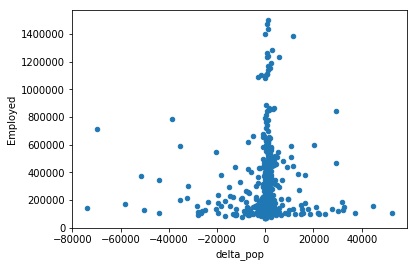

In [30]:
pop_200_split_df.plot('delta_pop', 'Employed', kind='scatter')